## VSM E1: FastText

This experiment uses word embeddings and FastText models to predict scores.

The three primary experiments we need to run are the following.

1. FastText on 6-Class problems
2. FastText in German and Spanish on 6-Class problem

### Hypotheses

1. Does using/increasing the N-Grams increase accuracy and correlation?
2. Does increasing model answers increase accuracy and by how much?
 - Increasing Model Answers should both increase accuracy, recall more-so than precision however.
3. What is the effect of length penalization?
 - Hypothesis: increased precision at cost of lower recall scores.
4. How well does it work across languages? 
 - It should work much more equally than for Knowledge Based Approaches.
 
 
### Notes

1. Word Embeddings in Non-English languages are wikipedia DB dumps taken from : https://github.com/Kyubyong/wordvectors

In [7]:
import sys
sys.path.append('../')
sys.path.append('../../../')
import libs.data as data
import libs.stats as stats
import libs.utils as utils
import libs.preprocessing as pp
import exp_libs.vsm as vsm
import pandas as pd
import numpy as np
import gensim
import spacy
from importlib import reload

In [8]:
df_en = data.load_dataframe('../../../datasets/final/en/asag_v2_en_filter.csv')
display(df_en.head(1))
nlp_en = spacy.load('en')

y_true_en = np.round(df_en['Score'].as_matrix())

ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   

                                                  MA  \
0   To simulate the behaviour of portions of the ...   

                                                 MA2  \
0  to provide an example and feedback of how the ...   

                                                 MA3  \
0  to serve as a proof of concept and illustrate ...   

                               NA  \
0  to find errors or collect data   

                                                  SA  MyScore  \
0   High risk problems are address in the prototy...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

## Exp. 01: Word-to-Word comparison (Finding Effect of N-Grams)

1. N-Gram Size = 1
2. Comparisons = Word-to-Word
3. Length Penalization = No
4. Model = fasttext-wikinews-subwords-300 (FastText)

In [5]:
import gensim.downloader as api
model = api.load('fasttext-wiki-news-subwords-300')

In [9]:
reload(vsm)

pipeline_fn = vsm.create_processing_fn(nlp_en, pp.EN_STOPS)
word2word_fn = vsm.create_word_to_word_similarity_function(model)

In [10]:
reload(vsm)
res1 = vsm.run_experiment(df_en,
                          pipeline_fn,
                          sim_fn=word2word_fn, 
                          ngram_size=1,
                          ma_count=1,
                          length_penalize=False)

/home/che/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


             precision    recall  f1-score   support

        0.0       0.14      0.07      0.10        14
        1.0       0.00      0.00      0.00         8
        2.0       0.27      0.23      0.25       234
        3.0       0.11      0.59      0.18       157
        4.0       0.29      0.32      0.30       676
        5.0       0.85      0.18      0.29       921

avg / total       0.53      0.26      0.28      2010

Pearson's R: 0.42868118718727743
Cohen's Kappa: 0.062016548933614746
MAE: 0.6711442786069651
Accuracy: 26.12%
Precision: 52.94%
Recall: 26.12%
F1-Measure: 28.05%


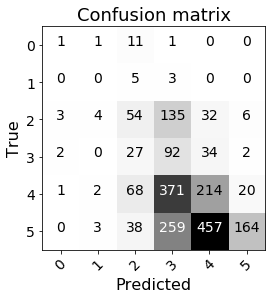

In [11]:
stats.print_all_stats(y_true_en, res1['y_pred'])
stats.plot_confusion_matrix(stats.cm(y_true_en, res1['y_pred']), classes=np.arange(6))

In [12]:
## Store Results
data.save('../tmp/vsm/vsm_e2_fastText_en_n1', res1)
data.load('../tmp/vsm/vsm_e2_fastText_en_n1')

{'y_pred': array([3., 4., 5., ..., 1., 5., 4.]),
 'y_pred_raw': array([0.61447029, 0.85092487, 0.97505408, ..., 0.12770224, 1.        ,
        0.71038407]),
 'y_pred_raw_all': array([[0.61447029],
        [0.85092487],
        [0.97505408],
        ...,
        [0.12770224],
        [1.        ],
        [0.71038407]])}

## Exp. 02: Word-to-Word comparison (Finding Effect of N-Grams N=2)

1. N-Gram Size = 2
2. Comparisons = Word-to-Word
3. Length Penalization = No
4. Model = wiki-gigaword-300 (Glove Word2Vec)

In [13]:
res2 = vsm.run_experiment(df_en,
                          pipeline_fn,
                          sim_fn=word2word_fn,
                          ngram_size=2,
                          ma_count=1,
                          length_penalize=False)

/home/che/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


             precision    recall  f1-score   support

        0.0       0.10      0.07      0.08        14
        1.0       0.00      0.00      0.00         8
        2.0       0.32      0.09      0.13       234
        3.0       0.13      0.61      0.21       157
        4.0       0.32      0.47      0.38       676
        5.0       0.85      0.18      0.29       921

avg / total       0.55      0.30      0.29      2010

Pearson's R: 0.44671031969662217
Cohen's Kappa: 0.07094196488318871
MAE: 0.4930348258706468
Accuracy: 29.55%
Precision: 54.54%
Recall: 29.55%
F1-Measure: 29.39%


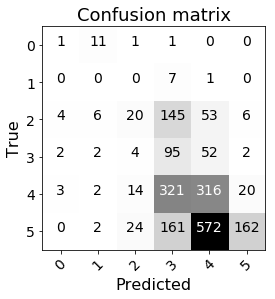

In [14]:
stats.print_all_stats(y_true_en, res2['y_pred'])
stats.plot_confusion_matrix(stats.cm(y_true_en, res2['y_pred']), classes=np.arange(6))

In [15]:
## Store Results
data.save('../tmp/vsm/vsm_e2_fastText_en_n2', res2)
data.load('../tmp/vsm/vsm_e2_fastText_en_n2')

{'y_pred': array([3., 4., 5., ..., 0., 5., 4.]),
 'y_pred_raw': array([0.6708168 , 0.85105949, 0.97945741, ..., 0.08513482, 1.        ,
        0.73467576]),
 'y_pred_raw_all': array([[0.6708168 ],
        [0.85105949],
        [0.97945741],
        ...,
        [0.08513482],
        [1.        ],
        [0.73467576]])}

## Exp. 03: Word-to-Word comparison (Finding Effect of N-Grams N=3)

1. N-Gram Size = 3
2. Comparisons = Word-to-Word
3. Length Penalization = No
4. Model = wiki-gigaword-300 (Glove Word2Vec)

In [16]:
res3 = vsm.run_experiment(df_en,
                          pipeline_fn,
                          sim_fn=word2word_fn, 
                          ngram_size=3,
                          ma_count=1,
                          length_penalize=False)

/home/che/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


             precision    recall  f1-score   support

        0.0       0.18      0.14      0.16        14
        1.0       0.00      0.00      0.00         8
        2.0       0.33      0.11      0.16       234
        3.0       0.14      0.44      0.21       157
        4.0       0.33      0.59      0.43       676
        5.0       0.85      0.18      0.30       921

avg / total       0.55      0.33      0.32      2010

Pearson's R: 0.43369220477569964
Cohen's Kappa: 0.08219520576873707
MAE: 0.39154228855721396
Accuracy: 33.03%
Precision: 55.29%
Recall: 33.03%
F1-Measure: 31.63%


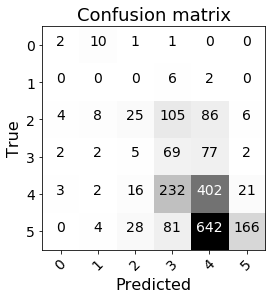

In [17]:
stats.print_all_stats(y_true_en, res3['y_pred'])
stats.plot_confusion_matrix(stats.cm(y_true_en, res3['y_pred']), classes=np.arange(6))

In [18]:
## Store Results
data.save('../tmp/vsm/vsm_e2_fastText_en_n3', res3)
data.load('../tmp/vsm/vsm_e2_fastText_en_n3')

{'y_pred': array([4., 4., 5., ..., 0., 5., 4.]),
 'y_pred_raw': array([0.70507525, 0.86221117, 0.98268008, ..., 0.08513482, 1.        ,
        0.73467576]),
 'y_pred_raw_all': array([[0.70507525],
        [0.86221117],
        [0.98268008],
        ...,
        [0.08513482],
        [1.        ],
        [0.73467576]])}

## Exp. 04: Word-to-Word comparison (Finding Effect of N-Grams N=4)
1. N-Gram Size = 4
2. Comparisons = Word-to-Word
3. Length Penalization = No
4. Model = wiki-gigaword-300 (Glove Word2Vec)

In [19]:
res4 = vsm.run_experiment(df_en,
                          pipeline_fn,
                          sim_fn=word2word_fn, 
                          ngram_size=4,
                          ma_count=1,
                          length_penalize=False)

/home/che/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


             precision    recall  f1-score   support

        0.0       0.17      0.14      0.15        14
        1.0       0.00      0.00      0.00         8
        2.0       0.31      0.11      0.16       234
        3.0       0.13      0.29      0.18       157
        4.0       0.34      0.67      0.45       676
        5.0       0.84      0.18      0.30       921

avg / total       0.55      0.35      0.32      2010

Pearson's R: 0.39504543483598425
Cohen's Kappa: 0.08330958718492376
MAE: 0.3447761194029851
Accuracy: 34.63%
Precision: 54.93%
Recall: 34.63%
F1-Measure: 32.32%


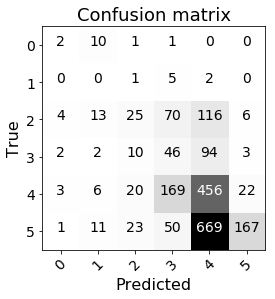

In [20]:
stats.print_all_stats(y_true_en, res4['y_pred'])
stats.plot_confusion_matrix(stats.cm(y_true_en, res4['y_pred']), classes=np.arange(6))

In [21]:
## Store Results
data.save('../tmp/vsm/vsm_e2_fastText_en_n4', res4)
data.load('../tmp/vsm/vsm_e2_fastText_en_n4')

{'y_pred': array([4., 4., 5., ..., 0., 5., 4.]),
 'y_pred_raw': array([0.72823344, 0.86837406, 0.98451241, ..., 0.08513482, 1.        ,
        0.73467576]),
 'y_pred_raw_all': array([[0.72823344],
        [0.86837406],
        [0.98451241],
        ...,
        [0.08513482],
        [1.        ],
        [0.73467576]])}

### Exp 01-04: N-Gram Summary

1. Increasing N-Grams did nothing but increase the accuracy of the model. 
2. It also (obviously) increased the computational complexity and running time of the algorithm.
3. It shows dimenishing returns after n=3 b/c correlation is dropping.

## Exp. 05: Model Answer comparisons (Finding Effect of Model Answer Sizes MA=2)
1. N-Gram Size = 3
2. Comparisons = Word-to-Word
3. Length Penalization = No
4. Model Answer Count = 2
5. Model = wiki-gigaword-300 (Glove Word2Vec)

In [22]:
res5 = vsm.run_experiment(df_en,
                          pipeline_fn,
                          sim_fn=word2word_fn, 
                          ngram_size=3,
                          ma_count=2,
                          length_penalize=False)

/home/che/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


             precision    recall  f1-score   support

        0.0       0.11      0.07      0.09        14
        1.0       0.00      0.00      0.00         8
        2.0       0.43      0.09      0.15       234
        3.0       0.17      0.31      0.22       157
        4.0       0.37      0.74      0.50       676
        5.0       0.85      0.27      0.40       921

avg / total       0.58      0.41      0.39      2010

Pearson's R: 0.4371151637629569
Cohen's Kappa: 0.14514067088808846
MAE: 0.21194029850746268
Accuracy: 40.65%
Precision: 57.74%
Recall: 40.65%
F1-Measure: 38.74%


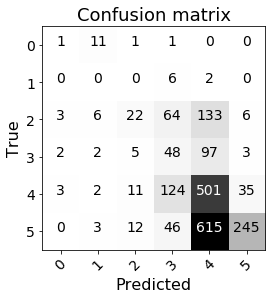

In [23]:
stats.print_all_stats(y_true_en, res5['y_pred'])
stats.plot_confusion_matrix(stats.cm(y_true_en, res5['y_pred']), classes=np.arange(6))

In [24]:
## Store Results
data.save('../tmp/vsm/vsm_e2_fastText_en_n3_ma2', res5)
data.load('../tmp/vsm/vsm_e2_fastText_en_n3_ma2')

{'y_pred': array([4., 4., 5., ..., 1., 5., 4.]),
 'y_pred_raw': array([0.72363286, 0.86221117, 0.98268008, ..., 0.14678731, 1.        ,
        0.73467576]),
 'y_pred_raw_all': array([[0.70507525, 0.72363286],
        [0.86221117, 0.75443639],
        [0.98268008, 0.72145786],
        ...,
        [0.08513482, 0.14678731],
        [1.        , 0.8104867 ],
        [0.73467576, 0.45695808]])}

## Exp. 06: Model Answer comparisons (Finding Effect of Model Answer Sizes MA=3)
1. N-Gram Size = 3
2. Comparisons = Word-to-Word
3. Length Penalization = No
4. Model Answer Count = 3
5. Model = wiki-gigaword-300 (Glove Word2Vec)

In [25]:
res6 = vsm.run_experiment(df_en,
                          pipeline_fn,
                          sim_fn=word2word_fn, 
                          ngram_size=3,
                          ma_count=3,
                          length_penalize=False)

/home/che/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


             precision    recall  f1-score   support

        0.0       0.17      0.07      0.10        14
        1.0       0.00      0.00      0.00         8
        2.0       0.51      0.09      0.15       234
        3.0       0.17      0.23      0.19       157
        4.0       0.39      0.78      0.52       676
        5.0       0.83      0.33      0.47       921

avg / total       0.59      0.44      0.42      2010

Pearson's R: 0.4582969342048624
Cohen's Kappa: 0.17766792608727489
MAE: 0.12736318407960198
Accuracy: 44.13%
Precision: 58.57%
Recall: 44.13%
F1-Measure: 42.38%


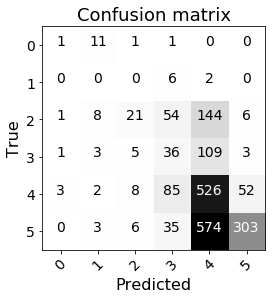

In [26]:
stats.print_all_stats(y_true_en, res6['y_pred'])
stats.plot_confusion_matrix(stats.cm(y_true_en, res6['y_pred']), classes=np.arange(6))

In [27]:
## Store Results
data.save('../tmp/vsm/vsm_e2_fastText_en_n3_ma3', res6)
data.load('../tmp/vsm/vsm_e2_fastText_en_n3_ma3')

{'y_pred': array([4., 4., 5., ..., 1., 5., 4.]),
 'y_pred_raw': array([0.74172087, 0.86221117, 0.98268008, ..., 0.14678731, 1.        ,
        0.73467576]),
 'y_pred_raw_all': array([[0.70507525, 0.72363286, 0.74172087],
        [0.86221117, 0.75443639, 0.74432873],
        [0.98268008, 0.72145786, 0.65720996],
        ...,
        [0.08513482, 0.14678731, 0.14678731],
        [1.        , 0.8104867 , 0.8104867 ],
        [0.73467576, 0.45695808, 0.45695808]])}

### Exp 05-06: Model Answer Summary

1. Increasing model answers had the effect: increased accuracy, precision, recall, kappa, pearson's R.
2. Increased computational complexity and running time.
3. Saw a boost in accuracy of about 10% by adding 2 model answers. Bigger boost for 1st model answer than for second.

## Exp. 07: Assessing the Effect of Length Penalization
1. N-Gram Size = 3
2. Comparisons = Word-to-Word
3. Length Penalization = Yes
4. Model Answer Count = 1
5. Model = wiki-gigaword-300 (Glove Word2Vec)

In [28]:
res7 = vsm.run_experiment(df_en,
                          pipeline_fn,
                          sim_fn=word2word_fn,
                          ngram_size=3,
                          ma_count=1,
                          length_penalize=True)

/home/che/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


             precision    recall  f1-score   support

        0.0       0.03      0.14      0.05        14
        1.0       0.00      0.00      0.00         8
        2.0       0.14      0.26      0.18       234
        3.0       0.11      0.38      0.17       157
        4.0       0.38      0.32      0.35       676
        5.0       0.81      0.05      0.10       921

avg / total       0.53      0.19      0.19      2010

Pearson's R: 0.09871582688482276
Cohen's Kappa: 0.04275796421088496
MAE: 1.4233830845771145
Accuracy: 19.05%
Precision: 52.52%
Recall: 19.05%
F1-Measure: 19.49%


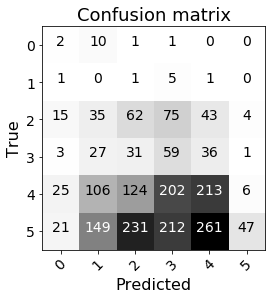

In [29]:
stats.print_all_stats(y_true_en, res7['y_pred'])
stats.plot_confusion_matrix(stats.cm(y_true_en, res7['y_pred']), classes=np.arange(6))

In [30]:
## Store Results
data.save('../tmp/vsm/vsm_e2_fastText_en_n3_ma1_length_penalize', res7)
data.load('../tmp/vsm/vsm_e2_fastText_en_n3_ma1_length_penalize')

{'y_pred': array([1., 1., 2., ..., 0., 1., 0.]),
 'y_pred_raw': array([0.19585424, 0.2395031 , 0.49134004, ..., 0.08513482, 0.2       ,
        0.06678871]),
 'y_pred_raw_all': array([[0.19585424],
        [0.2395031 ],
        [0.49134004],
        ...,
        [0.08513482],
        [0.2       ],
        [0.06678871]])}

### Exp. 07: Length Penalization Summary 

1. No Length Penalization: Recall=22%, Precision=51%, r=0.43, k=0.04
2. With Length Penalization: Recall=12%, Precision=46%, r=0.16, k=0.02
3. Result: Significantly worse on all counts.

Length penalization counts extra words in the student response against them. However, many responses contain extra information which is not bad. For instance, 43% of student responses have "extra info" while having a score above 3 (out of 5).

Length penalization doesn't make much sense given this information. What would make sense is somehow looking inside this extra information to determine if it contains false assertions or contradictory information and downgrading a score based on this.

In [31]:
len(df_en[np.logical_and(df_en['Feedback_Notes'].str.contains('extra_info'), df_en['MyScore'] > 3)]) / len(df_en)

0.42835820895522386

## Exp. 08: Cross-Language Comparison
1. N-Gram Size = 3
2. Comparisons = Word-to-Word
3. Length Penalization = No
4. Model Answer Count = 1
5. Language = Spanish
5. Model = wiki-300 (Word2Vec Spanish)

In [32]:
df_es = data.load_dataframe('../../../datasets/final/es/asag_v2_es_filter.csv')
display(df_es.head(1))
nlp_es = spacy.load('es')
y_true_es = np.round(df_es['Score'].as_matrix())

ID  AID  QID                                             Prompt  \
0  1.1    1    1  ¿Cuál es el papel de un programa prototipo en ...   

                                                  MA  \
0  Para simular el comportamiento de porciones de...   

                                                 MA2  \
0  para proporcionar un ejemplo y retroalimentaci...   

                                                 MA3  \
0  para servir como prueba de concepto e ilustrar...   

                                         NA  \
0  para encontrar errores o recopilar datos   

                                                  SA  MyScore  \
0  Los problemas de alto riesgo se abordan en el ...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

In [38]:
model_es = vsm.load_fasttext_saved('../../../vector_models/small_models/es/fast_text/spanish')

In [39]:
pipeline_es_fn = vsm.create_processing_fn(nlp_es, pp.ES_STOPS)
word2word_es_fn = vsm.create_word_to_word_similarity_function(model_es)

In [40]:
res8 = vsm.run_experiment(df_es,
                          pipeline_es_fn,
                          sim_fn=word2word_es_fn,
                          ngram_size=3,
                          ma_count=1,
                          length_penalize=False)

/home/che/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


             precision    recall  f1-score   support

        0.0       0.50      0.64      0.56        14
        1.0       0.03      0.12      0.05         8
        2.0       0.31      0.28      0.29       234
        3.0       0.10      0.72      0.18       157
        4.0       0.24      0.21      0.23       676
        5.0       0.92      0.07      0.13       921

avg / total       0.55      0.20      0.19      2010

Pearson's R: 0.44681074408236593
Cohen's Kappa: 0.03480674654059801
MAE: 0.9144278606965174
Accuracy: 19.70%
Precision: 55.02%
Recall: 19.70%
F1-Measure: 18.96%


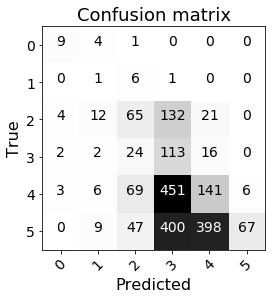

In [41]:
stats.print_all_stats(y_true_es, res8['y_pred'])
stats.plot_confusion_matrix(stats.cm(y_true_es, res8['y_pred']), classes=np.arange(6))

In [42]:
## Store Results
data.save('../tmp/vsm/vsm_e2_fastText_es_n3_ma1', res8)
data.load('../tmp/vsm/vsm_e2_fastText_es_n3_ma1')

{'y_pred': array([3., 4., 4., ..., 0., 5., 3.]),
 'y_pred_raw': array([0.58595767, 0.84596149, 0.85384315, ..., 0.        , 1.        ,
        0.68274241]),
 'y_pred_raw_all': array([[0.58595767],
        [0.84596149],
        [0.85384315],
        ...,
        [0.        ],
        [1.        ],
        [0.68274241]])}

## Exp. 09: Cross-Language Comparison (Language = German)
1. N-Gram Size = 3
2. Comparisons = Word-to-Word
3. Length Penalization = No
4. Model Answer Count = 1
5. Language = German
5. Model = wiki-300 (Word2Vec German)

In [44]:
df_de = data.load_dataframe('../../../datasets/final/de/asag_v2_de_filter.csv')
display(df_de.head(1))
nlp_de = spacy.load('de')
y_true_de = np.round(df_de['Score'].as_matrix())

model_de = vsm.load_word2vec('../../../vector_models/small_models/de/fast_text/german')

pipeline_de_fn = vsm.create_processing_fn(nlp_de, pp.DE_STOPS)
word2word_de_fn = vsm.create_word_to_word_similarity_function(model_de)

ID  AID  QID                                             Prompt  \
0  1.1    1    1  Welche Rolle spielt ein Prototyp-Programm bei ...   

                                                  MA  \
0  Um das Verhalten von Teilen des gewünschten So...   

                                                 MA2  \
0  um ein Beispiel und Feedback zur Funktionsweis...   

                                                 MA3  \
0  als Konzeptnachweis dienen und veranschauliche...   

                                          NA  \
0  um Fehler zu finden oder Daten zu sammeln   

                                                  SA  MyScore  \
0  In dem Prototyp-Programm werden Probleme mit h...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

In [45]:
res9 = vsm.run_experiment(df_de,
                          pipeline_de_fn,
                          sim_fn=word2word_de_fn,
                          ngram_size=3,
                          ma_count=1,
                          length_penalize=False)

/home/che/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


             precision    recall  f1-score   support

        0.0       0.09      0.86      0.16        14
        1.0       0.01      0.50      0.03         8
        2.0       0.17      0.47      0.25       234
        3.0       0.07      0.35      0.12       157
        4.0       0.15      0.03      0.06       676
        5.0       0.95      0.04      0.09       921

avg / total       0.51      0.12      0.10      2010

Pearson's R: 0.2701772710509167
Cohen's Kappa: 0.02082193581562397
MAE: 1.7885572139303483
Accuracy: 12.24%
Precision: 51.23%
Recall: 12.24%
F1-Measure: 9.76%


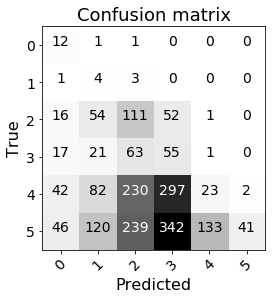

In [46]:
stats.print_all_stats(y_true_de, res9['y_pred'])
stats.plot_confusion_matrix(stats.cm(y_true_de, res9['y_pred']), classes=np.arange(6))

In [47]:
## Store Results
data.save('../tmp/vsm/vsm_e2_fastText_de_n3_ma1', res9)
data.load('../tmp/vsm/vsm_e2_fastText_de_n3_ma1')

{'y_pred': array([2., 3., 4., ..., 0., 5., 2.]),
 'y_pred_raw': array([0.41552483, 0.61773629, 0.83176294, ..., 0.        , 1.        ,
        0.36714536]),
 'y_pred_raw_all': array([[0.41552483],
        [0.61773629],
        [0.83176294],
        ...,
        [0.        ],
        [1.        ],
        [0.36714536]])}